In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches 
import seaborn as sns;

In [3]:
import os, sys, inspect

In [4]:
sns.set()

In [6]:
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.labelpad'] = 8
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

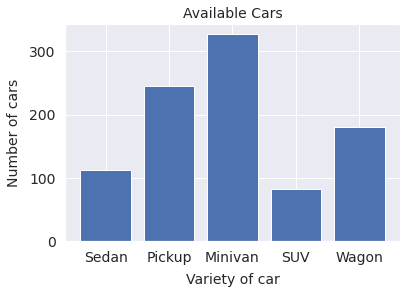

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(6,4))
plt.xlabel('Variety of car')
plt.ylabel('Number of cars')
plt.title('Available Cars')
car_names = ['Sedan', 'Pickup', 'Minivan', 'SUV', 'Wagon']
car_numbers = [113, 245, 327, 83, 181]
xp = range(len(car_names))
plt.bar(xp, car_numbers)
plt.xticks(xp, car_names)
plt.yticks([0, 100, 200, 300],[0, 100, 200, 300])
plt.show()
plt.savefig('car-bars')

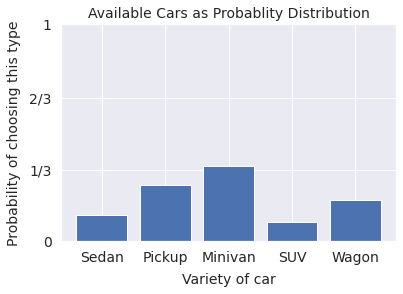

<Figure size 432x288 with 0 Axes>

In [8]:
fig_prob = plt.figure(figsize=(6, 4))
plt.title('Available Cars as Probablity Distribution')
plt.xlabel('Variety of car')
plt.ylabel('Probability of choosing this type')
car_types = ['Sedan', 'Pickup', 'Minivan', 'SUV', 'Wagon']
car_num = [113, 245, 327, 83, 181]
car_prob = car_num/np.sum(car_num)
xp_range = range(len(car_types))
plt.bar(car_types, car_prob)
plt.xticks(xp_range, car_types)
plt.yticks([0, .33, .66, 1], [0, '1/3', '2/3', 1])
plt.show()
plt.savefig('car-bars-normalized')

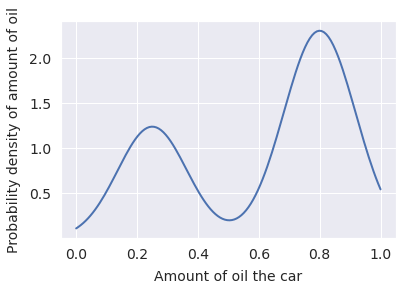

<Figure size 432x288 with 0 Axes>

In [58]:
def continuous_dist(x):
  v1 = 0.7 * np.exp(0.6 * -np.power(8*(x-0.25), 2))
  v2 = 1.3 * np.exp(1.0 * -np.power(6*(x-0.8), 2))
  return v1+v2

xs = np.linspace(0, 1, 130)
ys = [continuous_dist(x) for x in xs]

box_width = xs[1] - xs[0]
box_width2 = xs[2] - xs[1]
total_area = box_width * np.sum(ys)
normalized_ys = ys / total_area

plt.plot(xs, normalized_ys, linewidth=2)
plt.xlabel('Amount of oil the car')
plt.ylabel('Probability density of amount of oil')
plt.show()
plt.savefig('continuous-distribution')

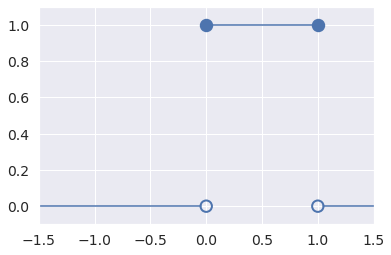

<Figure size 432x288 with 0 Axes>

In [57]:
plt_blue = '#4d74ae'

plt.plot([-1.5, -0.05], [0, 0], c=plt_blue)
plt.plot([1.05, 1.5], [0, 0], c=plt_blue)
plt.plot([0, 1], [1, 1], c=plt_blue)
plt.scatter(0, 0, s=130, facecolors='none', edgecolors=plt_blue, lw=2)
plt.scatter(0, 1, s=130, facecolors=plt_blue, edgecolors=plt_blue, lw=2)
plt.scatter(1, 0, s=130, facecolors='none', edgecolors=plt_blue, lw=2)
plt.scatter(1, 1, s=130, facecolors=plt_blue, edgecolors=plt_blue, lw=2)
plt.xlim(-1.5, 1.5)
plt.ylim(-0.1, 1.1)
plt.show()

plt.savefig('uniform-box-distribution')

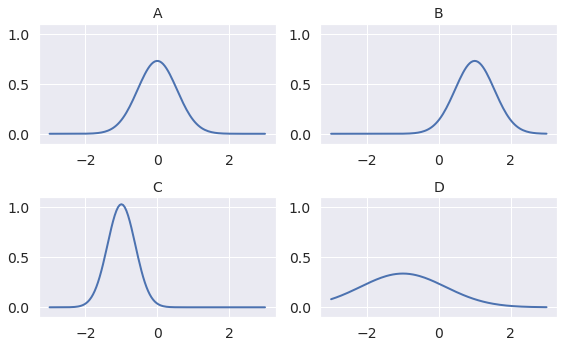

In [78]:
import math

def gaussian(x, mu, sigma2):
  part_one = 1 / (math.sqrt(sigma2) * math.sqrt(2 * math.pi))
  part_two = np.exp(-1 * ((np.power((x - mu), 2)) / (2 * sigma2)))
  return part_one * part_two 

xs = np.linspace(-3, 3, 130)
mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8, 5))
subplot_num = 1

for mu, sigma in zip(mu_list, sigma_list):
  plt.subplot(2, 2, subplot_num)
  ys = [gaussian(x, mu, sigma) for x in xs]
  plt.plot(xs, ys, lw=2)
  plt.ylim(-0.1, 1.1)
  plt.title('ABCD'[subplot_num-1])
  subplot_num += 1

plt.tight_layout()
plt.savefig('gaussian-distribution')
plt.show()

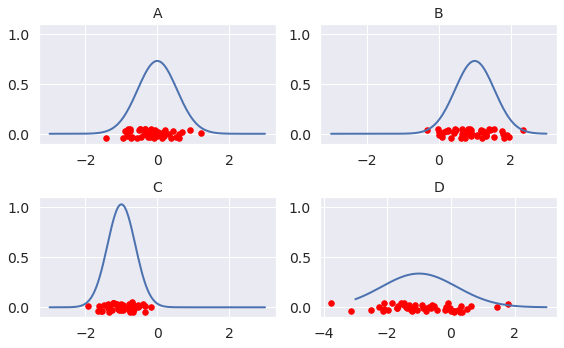

In [101]:
np.random.seed(45)
xs = np.linspace(-3, 3, 130)
mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8, 5))
subplot_num = 1
num_samples = 50

for mu, sigma in zip(mu_list, sigma_list):
  plt.subplot(2, 2, subplot_num)
  ys = [gaussian(x, mu, sigma) for x in xs]
  plt.plot(xs, ys, lw=2)
  drawn_samples = np.random.normal(loc=mu, scale=math.sqrt(sigma), size=num_samples)
  plt.scatter(drawn_samples, np.random.uniform(-0.05, 0.05, len(drawn_samples)), c='red', s=30)
  plt.ylim(-0.1, 1.1)
  plt.title('ABCD'[subplot_num - 1])
  subplot_num += 1

plt.tight_layout()
plt.savefig('guassian-with-sample')
plt.show()

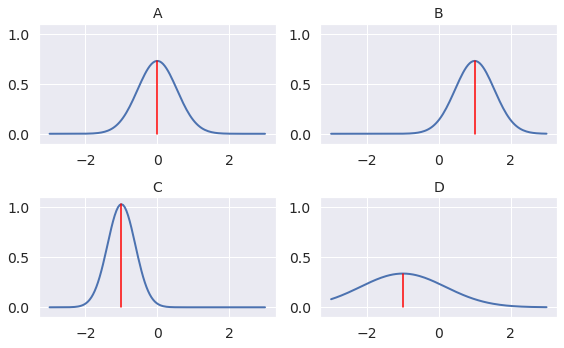

In [109]:
xs = np.linspace(-3, 3, 130)
mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8, 5))
subplot_num = 1

for mu, sigma in zip(mu_list, sigma_list):
  plt.subplot(2, 2, subplot_num)
  ys = [gaussian(x, mu, sigma) for x in xs]
  plt.plot(xs, ys, lw=2)
  plt.plot([mu, mu], [0, gaussian(mu, mu, sigma)], c='red')
  plt.ylim(-0.1, 1.1)
  plt.title('ABCD'[subplot_num - 1])
  subplot_num += 1

plt.tight_layout()
plt.savefig('guassian-with-mean')
plt.show()

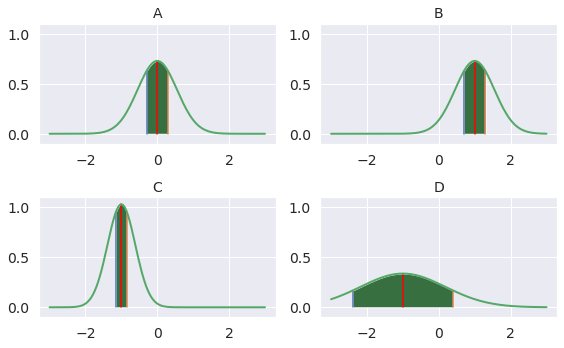

<Figure size 432x288 with 0 Axes>

In [128]:
xs = np.linspace(-3, 3, 130)
mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8, 5))
subplot_num = 1

for mu, sigma in zip(mu_list, sigma_list):
  plt.subplot(2, 2, subplot_num)
  ys = [gaussian(x, mu, sigma) for x in xs]
  plt.plot([mu, mu], [0, gaussian(mu, mu, sigma)], c='red')
  plt.plot([mu - sigma, mu - sigma], [0, gaussian(mu - sigma, mu, sigma)])
  plt.plot([mu + sigma, mu + sigma], [0, gaussian(mu + sigma, mu, sigma)])
  fill_xs = np.linspace(mu - sigma, mu + sigma, 50)
  fill_ys = [gaussian(x, mu, sigma) for x in fill_xs]
  ax = plt.gca()
  ax.fill_between(fill_xs, 0, fill_ys, facecolor="#386F40")
  plt.plot(xs, ys, lw=2)
  plt.ylim(-0.1, 1.1)
  plt.title('ABCD'[subplot_num - 1])
  subplot_num += 1

plt.tight_layout()
plt.show()
plt.savefig('gaussian-with-one-standard-deviation')

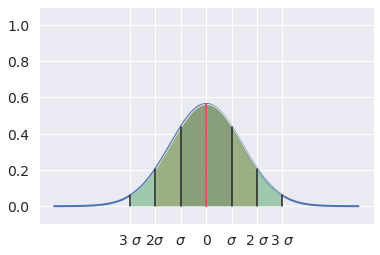

<Figure size 432x288 with 0 Axes>

In [146]:
xs = np.linspace(-3, 3, 200)

mu = 0
sigma = 0.5
ys = [gaussian(x, mu, sigma) for x in xs]
fig = plt.figure()
ax = plt.gca()

plt.plot(xs, ys, lw=2)
plt.plot([mu, mu],[0,gaussian(mu, mu, sigma)], lw=2, color='#E84F69', zorder=20)

for steps in [1, 2, 3]:
  sigma_n = steps * sigma
  plt.plot([mu - sigma_n, mu - sigma_n], [0, gaussian(mu - sigma_n, mu, sigma)], color='#222222', zorder=20)
  plt.plot([mu + sigma_n, mu + sigma_n], [0, gaussian(mu + sigma_n, mu, sigma)], color='#222222', zorder=20)
  fill_xs = np.linspace(mu - sigma_n, mu + sigma_n, 50)
  fill_ys = [gaussian(x, mu, sigma) for x in fill_xs]
  ax.fill_between(fill_xs, 0, fill_ys, alpha=0.5, zorder=10)

plt.ylim(-0.1, 1.1)
plt.xticks([-3*sigma, -2*sigma, -sigma, 0, sigma, 2*sigma, 3*sigma],
           ['3 $\sigma$', '2$\sigma$', '$\sigma$', 0, '$\sigma$', '2 $\sigma$', '3 $\sigma$'])

plt.show()
plt.savefig('gaussian-with-three-standard-deviations')

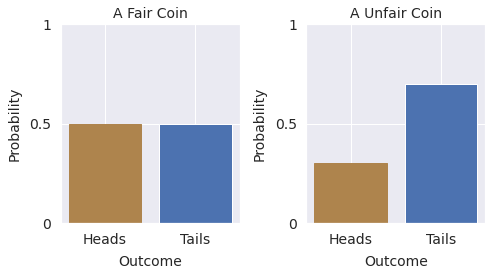

<Figure size 432x288 with 0 Axes>

In [168]:
fig = plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
bar_list = plt.bar([0, 1], [0.5, 0.5], align='center')
bar_list[0].set_color('#ae844d')
plt.xticks([0, 1], ['Heads', 'Tails'])
plt.yticks([0, 0.5, 1], [0, 0.5, 1])
plt.ylim(0, 1)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('A Fair Coin')

plt.subplot(1, 2, 2)
bar_list_2 = plt.bar([0, 1], [0.3, 0.7], align='center')
bar_list_2[0].set_color('#ae844d')
plt.xticks([0, 1], ['Heads', 'Tails'])
plt.yticks([0, 0.5, 1], [0, 0.5, 1])
plt.ylim(0, 1)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('A Unfair Coin')

plt.tight_layout()
plt.show()
plt.savefig('bernoulli-distribution')

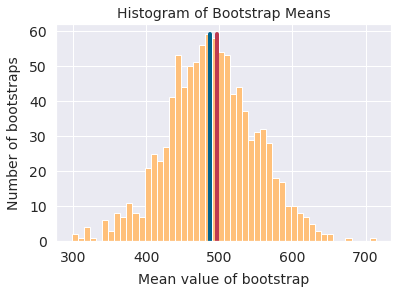

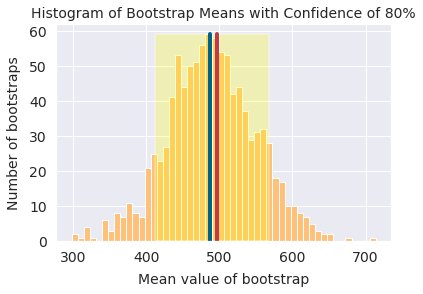

In [179]:
def get_population(num_elements, low, high):
    population = []
    for i in range(num_elements):
        element = int(np.random.uniform(low, high))
        population.append(element)
    return population

def get_sample_set(population, num_elements):
    sample_set = np.random.choice(a=population, size=num_elements, replace=False)
    return sample_set

def get_bootstrap(sample_set, num_elements):
    bootstrap = np.random.choice(a=sample_set, size=num_elements, replace=True)
    return bootstrap

def do_bootstraps(population_size, population_range, sample_set_size, bootstrap_size, num_bootstraps):
    np.random.seed(42)
    population = get_population(population_size, 0, population_range)
    sample_set = get_sample_set(population, sample_set_size)
    bootstrap_list = []
    for i in range(num_bootstraps):
        bootstrap = get_bootstrap(sample_set, bootstrap_size)
        bootstrap_list.append(bootstrap)
    population_mean = np.mean(population)
    sample_set_mean = np.mean(sample_set)
    bootstrap_means = [np.mean(bootstrap) for bootstrap in bootstrap_list]
    
    n, bins, hpatches = plt.hist(bootstrap_means, 50, color='#FFC07A')
    plt.plot([sample_set_mean, sample_set_mean], [0, max(n)], color='#00638C', lw=4)
    plt.plot([population_mean, population_mean], [0, max(n)], color='#BD3A50', lw=4)
    plt.title('Histogram of Bootstrap Means')
    plt.xlabel('Mean value of bootstrap')
    plt.ylabel('Number of bootstraps')
    plt.savefig('bootstrap-histogram')
    plt.show()

    n, bins, hpatches = plt.hist(bootstrap_means, 50, color='#FFC07A')
    plt.plot([sample_set_mean, sample_set_mean], [0, max(n)], color='#00638C', lw=4)
    plt.plot([population_mean, population_mean], [0, max(n)], color='#BD3A50', lw=4)
    confidence = 0.8
    gap = (1-confidence)/2
    sorted_bootstrap_means = sorted(bootstrap_means)
    low_index = int(gap * len(sorted_bootstrap_means))
    high_index = int((1-gap) * len(sorted_bootstrap_means))
    low_value = sorted_bootstrap_means[low_index]
    high_value = sorted_bootstrap_means[high_index]
    rect_left = low_value
    rect_bottom = 0
    rect_width = high_value-low_value
    rect_height = max(n)
    currentAxis = plt.gca()
    conf_rect = patches.Rectangle((rect_left, rect_bottom), 
                             rect_width, rect_height, facecolor="yellow", 
                             alpha=0.25, lw=2)
    currentAxis.add_patch(conf_rect)
    plt.title('Histogram of Bootstrap Means with Confidence of '+str(int(100*confidence))+'%')
    plt.xlabel('Mean value of bootstrap')
    plt.ylabel('Number of bootstraps')
    plt.savefig('bootstrap-histogram-confidence')
    plt.show()

do_bootstraps(population_size=5000, population_range=1000,
             sample_set_size=500, bootstrap_size=20, num_bootstraps=1000)  

In [180]:
Anscombe = [
    [
        [10.0, 8.04], [8.0, 6.95], [13.0, 7.58], [9.0, 8.81], [11.0, 8.33],
        [14.0, 9.96], [6.0, 7.24], [4.0, 4.26], [12.0, 10.84], [7.0, 4.82], [5.0, 5.68]
    ],[
        [10.0, 9.14], [8.0, 8.14], [13.0, 8.74], [9.0, 8.77], [11.0, 9.26],
        [14.0, 8.10], [6.0, 6.13], [4.0, 3.10], [12.0, 9.13], [7.0, 7.26], [5.0, 4.74]
    ],[
        [10.0, 7.46], [8.0, 6.77], [13.0, 12.74], [9.0, 7.11], [11.0, 7.81],
        [14.0, 8.84], [6.0, 6.08], [4.0, 5.39], [12.0, 8.15], [7.0, 6.42], [5.0, 5.73]
    ],[
        [8.0, 6.58], [8.0, 5.76], [8.0, 7.71], [8.0, 8.84], [8.0, 8.47], 
        [8.0, 7.04], [8.0, 5.25], [19.0, 12.50], [8.0, 5.56], [8.0, 7.91], [8.0, 6.89]
    ]
    ]

Anscombe_clrs = ['#730046', '#FFCD30', '#E88E34', '#C93F0F']
Anscombe_markers = ['o', '^', 's', 'D']

In [184]:
for dataset in range(4):
  xs = [v[0] for v in Anscombe[dataset]]
  ys = [v[1] for v in Anscombe[dataset]]  
  xmean = np.mean(xs)
  xstd = np.std(xs)
  ymean = np.mean(ys)
  ystd = np.std(ys)
  corr = np.corrcoef(xs, ys)
  line = np.polyfit(xs, ys, 1)
  print('----quartet', dataset)
  print("xmean= %3.2f x stddev= %3.2f" % (xmean, xstd))
  print("ymean= %3.2f y stddev= %3.2f" % (ymean, ystd))
  print("correlation x and y = %3.2f" % corr[0][1])
  print("best line slope %3.2f and intercept %3.2f" % (line[0], line[1]))

----quartet 0
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00
----quartet 1
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00
----quartet 2
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00
----quartet 3
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00


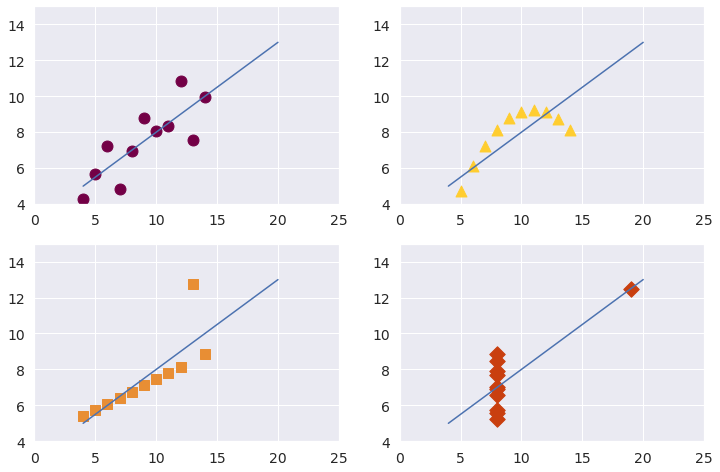

<Figure size 432x288 with 0 Axes>

In [195]:
fig = plt.figure(figsize=(12, 8))
for dataset in range(4):
  xs = [v[0] for v in Anscombe[dataset]]
  ys = [v[1] for v in Anscombe[dataset]]
  plt.subplot(2, 2, dataset+1)
  plt.scatter(xs, ys, s=120, marker=Anscombe_markers[dataset], c=Anscombe_clrs[dataset])
  line = np.polyfit(xs, ys, 1)
  plt.plot([4, 20], [(4*line[0])+line[1], (20*line[0])+line[1]])
  plt.xlim(0, 25)
  plt.ylim(4, 15)

plt.show()
plt.savefig("statistics can't tell everything")

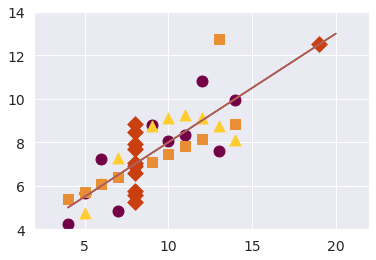

<Figure size 432x288 with 0 Axes>

In [200]:
for dataset in range(4):
  xs = [v[0] for v in Anscombe[dataset]]
  ys = [v[1] for v in Anscombe[dataset]]
  plt.scatter(xs, ys, s=120, marker=Anscombe_markers[dataset], c=Anscombe_clrs[dataset])
  line = np.polyfit(xs, ys, 1)
  plt.plot([4, 20], [(4*line[0])+line[1], (20*line[0])+line[1]])

plt.xlim(2, 22)
plt.ylim(4, 14)
plt.show()
plt.savefig('all-in-one')